In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [3]:
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Sex   Age  \
0          1    15634602  Hargrave        619.0    France  Female  1.0  42.0   
1          2    15647311      Hill        608.0     Spain  Female  1.0  41.0   
2          3    15619304      Onio        502.0    France  Female  1.0  42.0   
3          4    15701354      Boni        699.0    France  Female  1.0  39.0   
4          5    15737888  Mitchell        850.0     Spain  Female  1.0  43.0   
5          6    15574012       Chu        645.0     Spain    Male  0.0  44.0   
6          7    15592531  Bartlett        822.0    France    Male  0.0  -1.0   
7          8    15656148    Obinna        376.0   Germany  Female  1.0  29.0   
8          9    15792365        He        501.0    France    Male  0.0  44.0   
9         10    15592389        H?        684.0    France    Male  0.0  27.0   

   CurrentWorkingStatus  Tenure    Balance  NumOfProducts  ComplaintsLodged  \
0                   1.0     2.0       0.00            1.0               1.0   
1                   1.0     1.0   83807.86            1.0               0.0   
2                   1.0     8.0  159660.80            3.0               1.0   
3                   1.0     1.0       0.00            2.0               0.0   
4                   1.0     2.0  125510.82            1.0               0.0   
5                   1.0     8.0  113755.78            2.0               1.0   
6                   1.0     7.0       0.00            2.0               0.0   
7                   1.0     4.0  115046.74            4.0               1.0   
8                   1.0     4.0  142051.07            2.0               0.0   
9                   1.0     2.0  134603.88            1.0               0.0   

   HasCrCard  IsActiveMember EstimatedSalary Exited  
0        1.0             1.0       101348.88    Yes  
1        0.0             1.0       112542.58     No  
2        1.0             0.0       113931.57    Yes  
3        0.0             0.0               ?     No  
4        1.0             1.0         79084.1     No  
5        1.0             0.0       149756.71    Yes  
6        1.0             1.0         10062.8     No  
7        1.0             0.0       119346.88    Yes  
8        0.0             1.0         74940.5     No  
9        1.0             1.0        71725.73     No

In [4]:
(df['Exited'].value_counts()/df['Exited'].count())*100

No     79.63
Yes    20.37
Name: Exited, dtype: float64

In [5]:
df = df.replace({ "?": np.nan})

In [6]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)


In [7]:
df.isnull().sum()

RowNumber                 0
CustomerId                0
Surname                  86
CreditScore              37
Geography                37
Gender                   37
Sex                     195
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

Task 1: 
Question 1
what is the proportion of customers who exited and stopped using the banking services?

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname','Sex'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

CreditScore              37
Geography                37
Gender                   37
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

In [10]:
df.head(10)

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
0        619.0    France  Female  42.0                   1.0     2.0   
1        608.0     Spain  Female  41.0                   1.0     1.0   
2        502.0    France  Female  42.0                   1.0     8.0   
3        699.0    France  Female  39.0                   1.0     1.0   
4        850.0     Spain  Female  43.0                   1.0     2.0   
5        645.0     Spain    Male  44.0                   1.0     8.0   
6        822.0    France    Male  -1.0                   1.0     7.0   
7        376.0   Germany  Female  29.0                   1.0     4.0   
8        501.0    France    Male  44.0                   1.0     4.0   
9        684.0    France    Male  27.0                   1.0     2.0   

     Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0       0.00            1.0               1.0        1.0             1.0   
1   83807.86            1.0               0.0        0.0             1.0   
2  159660.80            3.0               1.0        1.0             0.0   
3       0.00            2.0               0.0        0.0             0.0   
4  125510.82            1.0               0.0        1.0             1.0   
5  113755.78            2.0               1.0        1.0             0.0   
6       0.00            2.0               0.0        1.0             1.0   
7  115046.74            4.0               1.0        1.0             0.0   
8  142051.07            2.0               0.0        0.0             1.0   
9  134603.88            1.0               0.0        1.0             1.0   

   EstimatedSalary Exited  
0        101348.88    Yes  
1        112542.58     No  
2        113931.57    Yes  
3              NaN     No  
4         79084.10     No  
5        149756.71    Yes  
6         10062.80     No  
7        119346.88    Yes  
8         74940.50     No  
9         71725.73     No

In [11]:
print(df.apply(lambda col: col.unique()))

CreditScore             [619.0, 608.0, 502.0, 699.0, 850.0, 645.0, 822...
Geography                       [France, Spain, Germany, DE, nan, ES, FR]
Gender                                                [Female, Male, nan]
Age                     [42.0, 41.0, 39.0, 43.0, 44.0, -1.0, 29.0, 27....
CurrentWorkingStatus                                      [1.0, nan, 0.0]
Tenure                  [2.0, 1.0, 8.0, 7.0, 4.0, 6.0, 3.0, 10.0, 5.0,...
Balance                 [0.0, 83807.86, 159660.8, 125510.82, 113755.78...
NumOfProducts                                   [1.0, 3.0, 2.0, 4.0, nan]
ComplaintsLodged                                          [1.0, 0.0, nan]
HasCrCard                                                 [1.0, 0.0, nan]
IsActiveMember                                            [1.0, 0.0, nan]
EstimatedSalary         [101348.88, 112542.58, 113931.57, nan, 79084.1...
Exited                                                          [Yes, No]
dtype: object


In [12]:
print(df.apply(lambda col: col.describe()))

        CreditScore Geography Gender          Age  CurrentWorkingStatus  \
25%      584.000000       NaN    NaN    32.000000              1.000000   
50%      652.000000       NaN    NaN    37.000000              1.000000   
75%      718.000000       NaN    NaN    44.000000              1.000000   
count   9963.000000      9963   9963  9963.000000           9963.000000   
freq            NaN      4963   5439          NaN                   NaN   
max      850.000000       NaN    NaN    92.000000              1.000000   
mean     650.624812       NaN    NaN    38.898223              0.996587   
min      350.000000       NaN    NaN    -1.000000              0.000000   
std       96.606044       NaN    NaN    10.541477              0.058321   
top             NaN    France   Male          NaN                   NaN   
unique          NaN         6      2          NaN                   NaN   

             Tenure        Balance  NumOfProducts  ComplaintsLodged  \
25%        3.000000       0.

In [13]:
df['NumOfProducts'].median()


1.0

In [14]:
df['NumOfProducts'].mode()

0    1.0
dtype: float64

Task 1: Question 3: Did you have to fix any data quality problems? Detail them. Apply the imputation methods to the variables that need it. List the variables that needed it. justify your choice of imputation if needed

In [15]:
#first step is to check null values and see how to deal with them
df.isnull().sum()

CreditScore              37
Geography                37
Gender                   37
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

In [16]:
df[ df.iloc[ :,:].isnull().sum(axis=1) >=12]

CreditScore Geography Gender  Age  CurrentWorkingStatus  Tenure  Balance  \
22           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
23           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
24           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
25           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
26           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
27           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
28           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
29           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
30           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
31           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
32           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
33           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
345          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
346          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
347          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
348          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
349          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
350          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
351          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
352          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
353          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
427          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
428          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
429          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
430          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
431          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
432          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
433          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
434          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
435          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
436          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
437          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
438          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
439          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
440          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
441          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
442          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   

     NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
22             NaN               NaN        NaN             NaN   
23             NaN               NaN        NaN             NaN   
24             NaN               NaN        NaN             NaN   
25             NaN               NaN        NaN             NaN   
26             NaN               NaN        NaN             NaN   
27             NaN               NaN        NaN             NaN   
28             NaN               NaN        NaN             NaN   
29             NaN               NaN        NaN             NaN   
30             NaN               NaN        NaN             NaN   
31             NaN               NaN        NaN             NaN   
32             NaN               NaN        NaN             NaN   
33             NaN               NaN        NaN             NaN   
345            NaN               NaN        NaN        

In [17]:
Y= df['Exited']
Y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
9995     No
9996     No
9997    Yes
9998    Yes
9999     No
Name: Exited, Length: 10000, dtype: object

In [18]:
df

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
0           619.0    France  Female  42.0                   1.0     2.0   
1           608.0     Spain  Female  41.0                   1.0     1.0   
2           502.0    France  Female  42.0                   1.0     8.0   
3           699.0    France  Female  39.0                   1.0     1.0   
4           850.0     Spain  Female  43.0                   1.0     2.0   
...           ...       ...     ...   ...                   ...     ...   
9995        771.0    France    Male  39.0                   1.0     5.0   
9996        516.0    France    Male  35.0                   1.0    10.0   
9997        709.0    France  Female  36.0                   1.0     7.0   
9998        772.0   Germany    Male  42.0                   1.0     3.0   
9999        792.0    France  Female  28.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0          0.00            1.0               1.0        1.0             1.0   
1      83807.86            1.0               0.0        0.0             1.0   
2     159660.80            3.0               1.0        1.0             0.0   
3          0.00            2.0               0.0        0.0             0.0   
4     125510.82            1.0               0.0        1.0             1.0   
...         ...            ...               ...        ...             ...   
9995       0.00            2.0               0.0        1.0             0.0   
9996   57369.61            1.0               0.0        1.0             1.0   
9997       0.00            1.0               1.0        0.0             1.0   
9998   75075.31            2.0               1.0        1.0             0.0   
9999  130142.79            1.0               0.0        1.0             0.0   

      EstimatedSalary Exited  
0           101348.88    Yes  
1           112542.58     No  
2           113931.57    Yes  
3                 NaN     No  
4            79084.10     No  
...               ...    ...  
9995         96270.64     No  
9996        101699.77     No  
9997         42085.58    Yes  
9998         92888.52    Yes  
9999         38190.78     No  

[10000 rows x 13 columns]

In [19]:
df = df[df['CreditScore'].notna()]

In [20]:
df.isnull().sum()

CreditScore               0
Geography                 0
Gender                    0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary         131
Exited                    0
dtype: int64

In [21]:
df[ df.iloc[ :,:].isnull().sum(axis=1) ==1]

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
3           699.0    France  Female  39.0                   1.0     1.0   
40          472.0     Spain    Male  40.0                   1.0     4.0   
59          614.0    France    Male  51.0                   1.0     4.0   
81          777.0    France  Female  32.0                   1.0     2.0   
86          750.0     Spain    Male  22.0                   1.0     3.0   
...           ...       ...     ...   ...                   ...     ...   
7538        601.0     Spain    Male  28.0                   1.0     6.0   
7539        755.0    France    Male  42.0                   1.0     2.0   
7540        553.0    France    Male  37.0                   1.0     1.0   
7541        723.0    France    Male  28.0                   1.0     4.0   
7542        507.0     Spain  Female  34.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
3          0.00            2.0               0.0        0.0             0.0   
40         0.00            1.0               0.0        1.0             0.0   
59     40685.92            1.0               0.0        1.0             1.0   
81         0.00            1.0               1.0        1.0             0.0   
86    121681.82            NaN               1.0        1.0             0.0   
...         ...            ...               ...        ...             ...   
7538       0.00            2.0               0.0        1.0             0.0   
7539  119919.12            1.0               0.0        1.0             0.0   
7540       0.00            1.0               0.0        1.0             0.0   
7541       0.00            2.0               0.0        1.0             1.0   
7542       0.00            2.0               0.0        1.0             1.0   

      EstimatedSalary Exited  
3                 NaN     No  
40                NaN     No  
59                NaN     No  
81                NaN    Yes  
86          128643.35    Yes  
...               ...    ...  
7538              NaN     No  
7539              NaN     No  
7540              NaN     No  
7541              NaN     No  
7542              NaN     No  

[213 rows x 13 columns]

C:\Users\61433\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

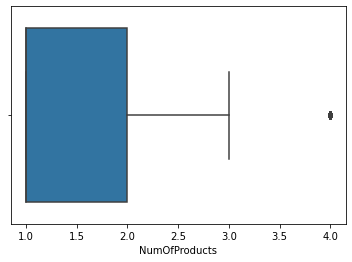

In [22]:
import seaborn as sns
#
# Box plot
#
sns.boxplot(df['NumOfProducts'])


C:\Users\61433\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumOfProducts', ylabel='Density'>

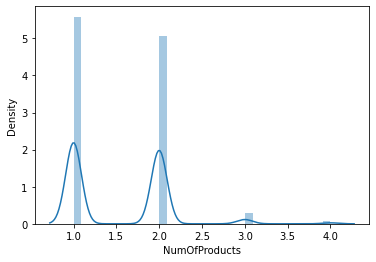

In [23]:
#
# Distribution plot
#
sns.distplot(df['NumOfProducts'])

In [24]:
df['NumOfProducts'] = df['NumOfProducts'].fillna(1)


<ipython-input-24-9d09d8291c00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumOfProducts'] = df['NumOfProducts'].fillna(1)


In [25]:
df[ df.iloc[ :,:].isnull().sum(axis=1) ==1]

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
3           699.0    France  Female  39.0                   1.0     1.0   
40          472.0     Spain    Male  40.0                   1.0     4.0   
59          614.0    France    Male  51.0                   1.0     4.0   
81          777.0    France  Female  32.0                   1.0     2.0   
97          814.0   Germany    Male  29.0                   1.0     8.0   
...           ...       ...     ...   ...                   ...     ...   
7538        601.0     Spain    Male  28.0                   1.0     6.0   
7539        755.0    France    Male  42.0                   1.0     2.0   
7540        553.0    France    Male  37.0                   1.0     1.0   
7541        723.0    France    Male  28.0                   1.0     4.0   
7542        507.0     Spain  Female  34.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
3          0.00            2.0               0.0        0.0             0.0   
40         0.00            1.0               0.0        1.0             0.0   
59     40685.92            1.0               0.0        1.0             1.0   
81         0.00            1.0               1.0        1.0             0.0   
97     97086.40            1.0               0.0        1.0             1.0   
...         ...            ...               ...        ...             ...   
7538       0.00            2.0               0.0        1.0             0.0   
7539  119919.12            1.0               0.0        1.0             0.0   
7540       0.00            1.0               0.0        1.0             0.0   
7541       0.00            2.0               0.0        1.0             1.0   
7542       0.00            2.0               0.0        1.0             1.0   

      EstimatedSalary Exited  
3                 NaN     No  
40                NaN     No  
59                NaN     No  
81                NaN    Yes  
97                NaN     No  
...               ...    ...  
7538              NaN     No  
7539              NaN     No  
7540              NaN     No  
7541              NaN     No  
7542              NaN     No  

[131 rows x 13 columns]

In [26]:
df['Age'].mean()

38.89822342667871

In [27]:
df['Age']=df['Age'].replace(-1,df['Age'].mean())



<ipython-input-27-da408a16c91b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(-1,df['Age'].mean())


In [28]:
df['EstimatedSalary']= df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

<ipython-input-28-d8c7a5970ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimatedSalary']= df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())


In [29]:
df[ df.iloc[ :,:].isnull().sum(axis=1) >0]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, CurrentWorkingStatus, Tenure, Balance, NumOfProducts, ComplaintsLodged, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [30]:
(df['Exited'].value_counts()/df['Exited'].count())*100

No     79.604537
Yes    20.395463
Name: Exited, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# target/input split
y = df['Exited']
X=df

X = pd.get_dummies(X)

In [33]:
rs = np.random.RandomState(0)

corr = X.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [34]:
X = df.drop(['Exited','ComplaintsLodged'], axis=1)
gender_map = {'Female':0, 'Male': 1}
X['Gender'] = X['Gender'].map(gender_map)
X = pd.get_dummies(X)

X.head(10)

CreditScore  Gender        Age  CurrentWorkingStatus  Tenure    Balance  \
0        619.0       0  42.000000                   1.0     2.0       0.00   
1        608.0       0  41.000000                   1.0     1.0   83807.86   
2        502.0       0  42.000000                   1.0     8.0  159660.80   
3        699.0       0  39.000000                   1.0     1.0       0.00   
4        850.0       0  43.000000                   1.0     2.0  125510.82   
5        645.0       1  44.000000                   1.0     8.0  113755.78   
6        822.0       1  38.898223                   1.0     7.0       0.00   
7        376.0       0  29.000000                   1.0     4.0  115046.74   
8        501.0       1  44.000000                   1.0     4.0  142051.07   
9        684.0       1  27.000000                   1.0     2.0  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_DE  \
0            1.0        1.0             1.0    101348.880000             0   
1            1.0        0.0             1.0    112542.580000             0   
2            3.0        1.0             0.0    113931.570000             0   
3            2.0        0.0             0.0    100198.151107             0   
4            1.0        1.0             1.0     79084.100000             0   
5            2.0        1.0             0.0    149756.710000             0   
6            2.0        1.0             1.0     10062.800000             0   
7            4.0        1.0             0.0    119346.880000             0   
8            2.0        0.0             1.0     74940.500000             0   
9            1.0        1.0             1.0     71725.730000             0   

   Geography_ES  Geography_FR  Geography_France  Geography_Germany  \
0             0             0                 1                  0   
1             0             0                 0                  0   
2             0             0                 1                  0   
3             0             0                 1                  0   
4             0             0                 0                  0   
5             0             0                 0                  0   
6             0             0                 1                  0   
7             0             0                 0                  1   
8             0             0                 1                  0   
9             0             0                 1                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1  
5                1  
6                0  
7                0  
8                0  
9                0

In [35]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [36]:
from dm_tools import analyse_feature_importance

In [37]:
X

CreditScore  Gender   Age  CurrentWorkingStatus  Tenure    Balance  \
0           619.0       0  42.0                   1.0     2.0       0.00   
1           608.0       0  41.0                   1.0     1.0   83807.86   
2           502.0       0  42.0                   1.0     8.0  159660.80   
3           699.0       0  39.0                   1.0     1.0       0.00   
4           850.0       0  43.0                   1.0     2.0  125510.82   
...           ...     ...   ...                   ...     ...        ...   
9995        771.0       1  39.0                   1.0     5.0       0.00   
9996        516.0       1  35.0                   1.0    10.0   57369.61   
9997        709.0       0  36.0                   1.0     7.0       0.00   
9998        772.0       1  42.0                   1.0     3.0   75075.31   
9999        792.0       0  28.0                   1.0     4.0  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_DE  \
0               1.0        1.0             1.0    101348.880000             0   
1               1.0        0.0             1.0    112542.580000             0   
2               3.0        1.0             0.0    113931.570000             0   
3               2.0        0.0             0.0    100198.151107             0   
4               1.0        1.0             1.0     79084.100000             0   
...             ...        ...             ...              ...           ...   
9995            2.0        1.0             0.0     96270.640000             0   
9996            1.0        1.0             1.0    101699.770000             0   
9997            1.0        0.0             1.0     42085.580000             0   
9998            2.0        1.0             0.0     92888.520000             0   
9999            1.0        1.0             0.0     38190.780000             0   

      Geography_ES  Geography_FR  Geography_France  Geography_Germany  \
0                0             0                 1                  0   
1                0             0                 0                  0   
2                0             0                 1                  0   
3                0             0                 1                  0   
4                0             0                 0                  0   
...            ...           ...               ...                ...   
9995             0             0                 1                  0   
9996             0             0                 1                  0   
9997             0             0                 1                  0   
9998             0             0                 0                  1   
9999             0             0                 1                  0   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[9963 rows x 16 columns]

In [164]:
# setting random state
rs = 10
# To ignore any future warnings
import warnings
warnings.filterwarnings("ignore")
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3,
 stratify=y, random_state=rs)

Task 2. Predictive Modeling Using Decision Trees (4 marks)
1. Build a decision tree using the default setting. Examine the tree results and
answer the following:
a.	What parameters have been used in building the tree? Detail them.

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# simple decision tree training
default_tree_model = DecisionTreeClassifier(random_state=rs)
default_tree_model.fit(X_train, y_train)
default_tree_model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [166]:
print(default_tree_model.tree_.max_depth)

24


In [167]:
default_tree_model.get_n_leaves()

994

c.	What is the size of the tree (number of nodes and rules)?

In [168]:
from sklearn import tree


treeObj = default_tree_model.tree_
print (treeObj.node_count)

1987


b.	What is classification accuracy on training and test datasets?


In [44]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.7875543660086985


In [45]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.86      0.87      2379
         Yes       0.48      0.51      0.50       610

    accuracy                           0.79      2989
   macro avg       0.68      0.68      0.68      2989
weighted avg       0.79      0.79      0.79      2989



d.	What are the 5 important variables in building the tree?

In [46]:
import numpy as np
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

Age : 0.22078732338803403
EstimatedSalary : 0.15537842943183153
CreditScore : 0.1533322791685879
Balance : 0.14938554729219905
NumOfProducts : 0.12343607734594501
Tenure : 0.06320244051703369
IsActiveMember : 0.06205034617778202
Gender : 0.01962292729823144
Geography_Germany : 0.01913445027366377
HasCrCard : 0.013138369688066285
Geography_Spain : 0.009453518747664874
Geography_France : 0.007355468059276937
Geography_FR : 0.001358207196910579
CurrentWorkingStatus : 0.0012759502227698584
Geography_ES : 0.0007288918065434627
Geography_DE : 0.0003597733854595541


In [51]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("basic_tree.png")
# You can find this file saved in the same directory as this notebook.


In [52]:
test_score = []
train_score = []
# check the model performance for max depth from 2-24
for max_depth in range(2, 25):
 model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
 model.fit(X_train, y_train)

 test_score.append(model.score(X_test, y_test))
 train_score.append(model.score(X_train, y_train))

e.	Report if you see any evidence of model overfitting.

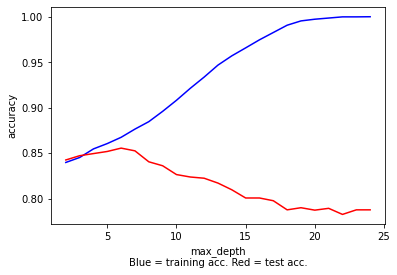

In [53]:
import matplotlib.pyplot as plt
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 25), train_score, 'b', range(2,25), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

Build another decision tree tuned with GridSearchCV. Examine the tree
results.

a.	What are the optimal parameters for this decision tree?


In [217]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 7),
 'min_samples_leaf': range(20, 60, 10)}
decision_tree_cv = GridSearchCV(param_grid=params, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
decision_tree_cv.fit(X_train, y_train)
print("Train accuracy:", decision_tree_cv.score(X_train, y_train))
print("Test accuracy:", decision_tree_cv.score(X_test, y_test))
# test the best model
y_pred = decision_tree_cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(decision_tree_cv.best_params_)

Train accuracy: 0.8639231431029538
Test accuracy: 0.8558046169287387
              precision    recall  f1-score   support

          No       0.86      0.98      0.92      2379
         Yes       0.81      0.39      0.52       610

    accuracy                           0.86      2989
   macro avg       0.83      0.68      0.72      2989
weighted avg       0.85      0.86      0.83      2989

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20}


In [170]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools import analyse_feature_importance, visualize_decision_tree
analyse_feature_importance(decision_tree_cv.best_estimator_, X.columns, 20)
visualize_decision_tree(decision_tree_cv.best_estimator_, X.columns, "optimal_tree.png")

Age : 0.40636679366041567
NumOfProducts : 0.3266155370808155
IsActiveMember : 0.13667520706317943
Balance : 0.07065498786986867
Geography_Germany : 0.04509148839468188
Gender : 0.006802968240706199
Tenure : 0.003652178763074451
EstimatedSalary : 0.0022632485823734097
CreditScore : 0.0018775903448848244
Geography_Spain : 0.0
Geography_France : 0.0
Geography_FR : 0.0
Geography_ES : 0.0
Geography_DE : 0.0
HasCrCard : 0.0
CurrentWorkingStatus : 0.0


In [92]:
y_train.value_counts()


No     5552
Yes    1422
Name: Exited, dtype: int64

In [171]:
optimum_tree = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 20)
optimum_tree.fit(X_train, y_train)
optimum_tree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

c.	What is the size of the chosen tree (number of nodes and rules)?

In [172]:
cvtreeObj = optimum_tree.tree_
print (cvtreeObj.node_count)

83


In [173]:
optimum_tree.get_n_leaves()

42

In [69]:
test_score = []
train_score = []
# check the model performance for max depth from 2-24
for max_depth in range(2, 7):
 cvmodel = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 20)
 cvmodel.fit(X_train, y_train)
 test_score.append(cvmodel.score(X_test, y_test))
 train_score.append(cvmodel.score(X_train, y_train))

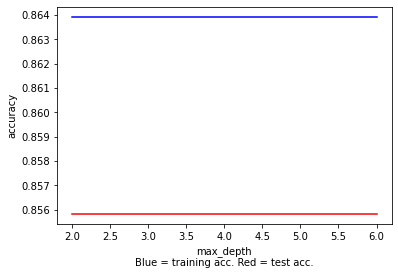

In [70]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 7), train_score, 'b', range(2,7), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

Task 3. Predictive Modeling Using Regression (5.5 marks)
1. Describe what and why you will have to do additional preparation for variables
to be used in regression modelling. List the variables that needed it with the
processing detail.


In [174]:
from sklearn.preprocessing import StandardScaler
# initialise a standard scaler object
scaler = StandardScaler()
# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)
print("After scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 350.0, max 850.0, mean 650.44 and std dev 96.11
Variable #1: min 0.0, max 1.0, mean 0.55 and std dev 0.50
Variable #2: min 18.0, max 92.0, mean 38.85 and std dev 10.49
Variable #3: min 0.0, max 1.0, mean 1.00 and std dev 0.06
Variable #4: min 0.0, max 10.0, mean 5.04 and std dev 2.89
After scaling
-------------
Variable #0: min -3.1260189589361795, max 2.076371426378983, mean -0.00 and std dev 1.00
Variable #1: min -1.1056376765312104, max 0.9044554298631223, mean -0.00 and std dev 1.00
Variable #2: min -1.9883045937658257, max 5.067595864253684, mean -0.00 and std dev 1.00
Variable #3: min -17.38440080371839, max 0.05752283390670684, mean -0.00 and std dev 1.00
Variable #4: min -1.7427614891318617, max 1.7183441678921738, mean -0.00 and std dev 1.00


2. Build a regression model using the default regression method with all
inputs. Once you have completed it, build another model and tune it using
GridSearchCV. Answer the following:
a.	Name the Regression function used.


In [97]:
# grab feature importances from the model and feature name from the original X
coef = logistic_model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', coef[i])

Age : 0.7358251296346786
IsActiveMember : -0.5134559517136145
Gender : -0.28113015334464314
Geography_Germany : 0.2155658387780123
Balance : 0.18961987805469943
Geography_France : -0.12503691343112208
Geography_Spain : -0.08117105237034872
CreditScore : -0.05429321498652847
Geography_FR : 0.044143217803191366
NumOfProducts : -0.04066647219250251
HasCrCard : -0.03141879255789253
EstimatedSalary : 0.026629301957732034
Tenure : -0.026465962520160556
CurrentWorkingStatus : 0.020100627257980206
Geography_ES : 0.019283843556485214
Geography_DE : 0.016289379679385218


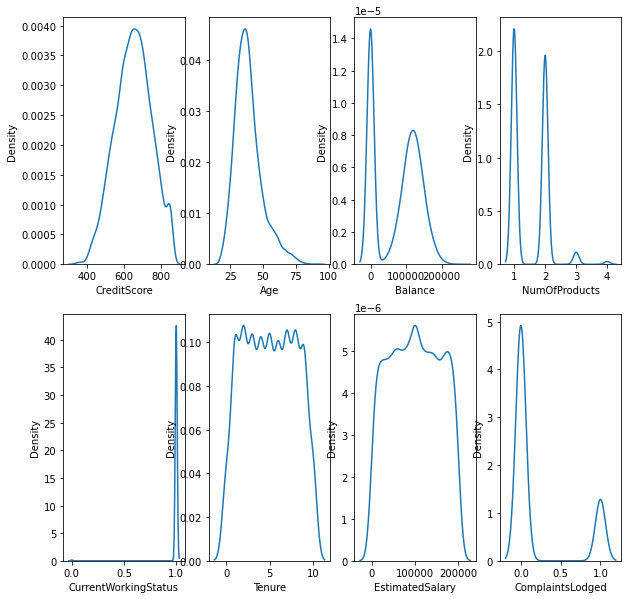

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_skewed_columns(df):
 # setting up subplots for easier visualisation
 f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)
 # gift avg plots
 sns.distplot(df['CreditScore'].dropna(), hist=False, ax=axes[0,0])
 sns.distplot(df['Age'].dropna(), hist=False, ax=axes[0,1])
 sns.distplot(df['CurrentWorkingStatus'].dropna(), hist=False, ax=axes[1,0])
 sns.distplot(df['Tenure'].dropna(), hist=False, ax=axes[1,1])
 # gift cnt plots
 sns.distplot(df['Balance'].dropna(), hist=False, ax=axes[0,2])
 sns.distplot(df['NumOfProducts'].dropna(), hist=False, ax=axes[0,3])
 sns.distplot(df['EstimatedSalary'].dropna(), hist=False, ax=axes[1,2])
 sns.distplot(df['ComplaintsLodged'].dropna(), hist=False, ax=axes[1,3])
 plt.show()

plot_skewed_columns(df)

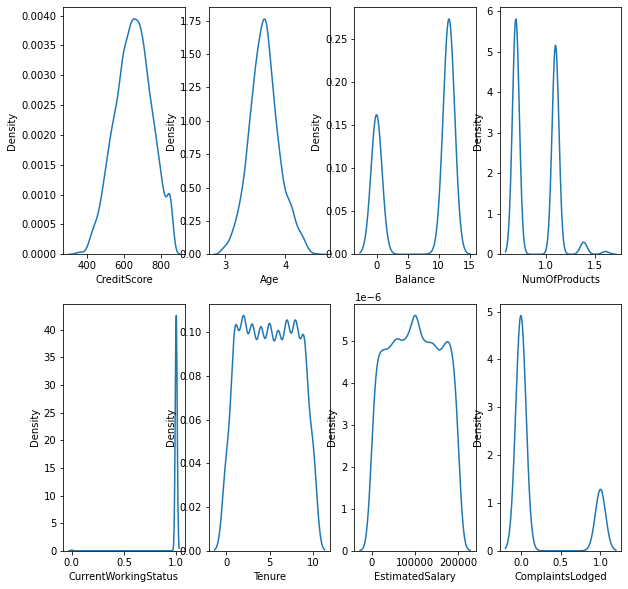

In [178]:
import numpy as np
# list columns to be transformed
columns_to_transform = ['Age', 'Balance', 'NumOfProducts']
# copy the dataframe
df_log = df.copy()
# transform the columns with np.log
for col in columns_to_transform:
 df_log[col] = df_log[col].apply(lambda x: x+1)
 df_log[col] = df_log[col].apply(np.log)
# plot them again to show the distribution
plot_skewed_columns(df_log)

In [179]:
# create X, y and train test data partitions
y_log = df_log['Exited']
X_log = df_log.drop(['Exited','ComplaintsLodged'], axis=1)
gender_map = {'Female':0, 'Male': 1}
X_log['Gender'] = X_log['Gender'].map(gender_map)
X_log = pd.get_dummies(X_log)
X_mat_log = X_log.values
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log,
 y_log,
test_size=0.3,
stratify=y_log,
random_state=rs)
# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)


In [188]:
from sklearn.linear_model import LogisticRegression
default_logistic_model = LogisticRegression(random_state=rs)
# fit it to training data
default_logistic_model.fit(X_train_log, y_train_log)
# training and test accuracy
print("Train accuracy:", default_logistic_model.score(X_train_log, y_train_log))
print("Test accuracy:", default_logistic_model.score(X_test_log, y_test_log))
# classification report on test data
y_pred = default_logistic_model.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

Train accuracy: 0.8151706337826211
Test accuracy: 0.8203412512546002
              precision    recall  f1-score   support

          No       0.83      0.97      0.90      2379
         Yes       0.67      0.24      0.35       610

    accuracy                           0.82      2989
   macro avg       0.75      0.60      0.62      2989
weighted avg       0.80      0.82      0.78      2989



In [181]:
# grab feature importances from the model and feature name from the original X
coef = default_logistic_model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', coef[i])

Age : 0.8289985701300124
IsActiveMember : -0.5019649929298847
Gender : -0.28036391882028305
Geography_Germany : 0.21892507062174385
Balance : 0.15091490653906106
NumOfProducts : -0.14391679888105907
Geography_France : -0.12594188090370612
Geography_Spain : -0.08425918636794726
CreditScore : -0.05299728507844653
Geography_FR : 0.047042609247296606
HasCrCard : -0.028535750254572622
EstimatedSalary : 0.026376322381661512
CurrentWorkingStatus : 0.024058487764988142
Tenure : -0.022859520771820727
Geography_ES : 0.02126589902850057
Geography_DE : 0.018205946393279243


In [190]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
logistic_cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
logistic_cv.fit(X_train_log, y_train_log)
# test the best model
print("Train accuracy:", logistic_cv.score(X_train_log, y_train_log))
print("Test accuracy:", logistic_cv.score(X_test_log, y_test_log))
y_pred = logistic_cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))
# print parameters of the best model
print(logistic_cv.best_params_)

Train accuracy: 0.8151706337826211
Test accuracy: 0.8166610906657745
              precision    recall  f1-score   support

          No       0.82      0.98      0.89      2379
         Yes       0.68      0.19      0.30       610

    accuracy                           0.82      2989
   macro avg       0.75      0.58      0.60      2989
weighted avg       0.80      0.82      0.77      2989

{'C': 0.01}


In [182]:
from sklearn.feature_selection import RFECV
logistic_rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
logistic_rfe.fit(X_train_log, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", logistic_rfe.n_features_)


Original feature set 16
Number of features after elimination 6


In [185]:
X.loc[:, logistic_rfe.support_]

Gender   Age    Balance  IsActiveMember  Geography_France  \
0          0  42.0       0.00             1.0                 1   
1          0  41.0   83807.86             1.0                 0   
2          0  42.0  159660.80             0.0                 1   
3          0  39.0       0.00             0.0                 1   
4          0  43.0  125510.82             1.0                 0   
...      ...   ...        ...             ...               ...   
9995       1  39.0       0.00             0.0                 1   
9996       1  35.0   57369.61             1.0                 1   
9997       0  36.0       0.00             1.0                 1   
9998       1  42.0   75075.31             0.0                 0   
9999       0  28.0  130142.79             0.0                 1   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[9963 rows x 6 columns]

In [186]:
logistic_X_train_sel = logistic_rfe.transform(X_train_log)
logistic_X_test_sel = logistic_rfe.transform(X_test_log)

In [191]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
logistic_rfe_cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
logistic_rfe_cv.fit(logistic_X_train_sel, y_train)
# test the best model
print("Train accuracy:", logistic_rfe_cv.score(logistic_X_train_sel, y_train))
print("Test accuracy:", logistic_rfe_cv.score(logistic_X_test_sel, y_test))
y_pred = logistic_rfe_cv.predict(logistic_X_test_sel)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(logistic_rfe_cv.best_params_)

Train accuracy: 0.8135933467163751
Test accuracy: 0.8173302107728337
              precision    recall  f1-score   support

          No       0.82      0.98      0.90      2379
         Yes       0.70      0.18      0.29       610

    accuracy                           0.82      2989
   macro avg       0.76      0.58      0.59      2989
weighted avg       0.80      0.82      0.77      2989

{'C': 0.01}


In [110]:
rfe.support_

array([False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True])

In [112]:
X.loc[:, rfe.support_]

Gender   Age    Balance  IsActiveMember  Geography_France  \
0          0  42.0       0.00             1.0                 1   
1          0  41.0   83807.86             1.0                 0   
2          0  42.0  159660.80             0.0                 1   
3          0  39.0       0.00             0.0                 1   
4          0  43.0  125510.82             1.0                 0   
...      ...   ...        ...             ...               ...   
9995       1  39.0       0.00             0.0                 1   
9996       1  35.0   57369.61             1.0                 1   
9997       0  36.0       0.00             1.0                 1   
9998       1  42.0   75075.31             0.0                 0   
9999       0  28.0  130142.79             0.0                 1   

      Geography_Spain  
0                   0  
1                   1  
2                   0  
3                   0  
4                   1  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                0  

[9963 rows x 6 columns]

Task 4. Predictive Modeling Using Neural Networks (5.5 marks)
1. Build a Neural Network model using the default setting. Answer the
following:


In [117]:
from sklearn.neural_network import MLPClassifier

In [210]:
default_nn_model = MLPClassifier(random_state=rs)
default_nn_model.fit(X_train_log, y_train)
print("Train accuracy:", default_nn_model.score(X_train_log, y_train))
print("Test accuracy:", default_nn_model.score(X_test_log, y_test))
y_pred = default_nn_model.predict(X_test_log)
print(classification_report(y_test, y_pred))
print(default_nn_model)

Train accuracy: 0.8799827932320046
Test accuracy: 0.8588156574105051
              precision    recall  f1-score   support

          No       0.88      0.95      0.91      2379
         Yes       0.72      0.50      0.59       610

    accuracy                           0.86      2989
   macro avg       0.80      0.73      0.75      2989
weighted avg       0.85      0.86      0.85      2989

MLPClassifier(random_state=10)


In [211]:
default_nn_model.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [120]:
test_score = []
train_score = []
# check the model performance for max depth from 2-24
for iteration in range(2,200):
 model = MLPClassifier(max_iter=iteration)
 model.fit(X_train, y_train)
 test_score.append(model.score(X_test, y_test))
 train_score.append(model.score(X_train, y_train))

c. Comment on the training process concerning underfitting, overfitting
or good fitting.


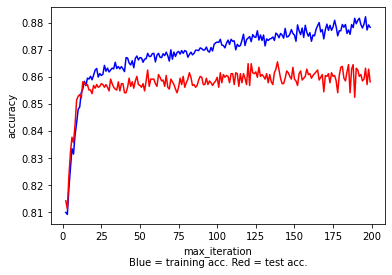

In [122]:
plt.plot(range(2,200), train_score, 'b', range(2,200), test_score, 'r')
plt.xlabel('max_iteration\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [123]:
test_score = []
train_score = []
# check the model performance for max depth from 2-24
for hidden_layer_sizes in range(2,200):
 model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
 model.fit(X_train, y_train)
 test_score.append(model.score(X_test, y_test))
 train_score.append(model.score(X_train, y_train))

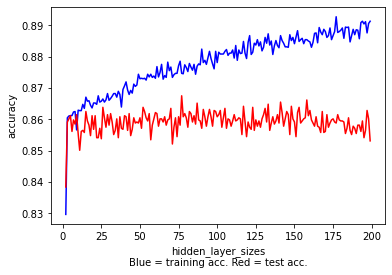

In [125]:
plt.plot(range(2,200), train_score, 'b', range(2,200), test_score, 'r')
plt.xlabel('hidden_layer_sizes\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [192]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001,0.000001], 'max_iter':[200,250,300,400], 'activation': ['relu']}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train)
print("Train accuracy:", cv.score(X_train_log, y_train))
print("Test accuracy:", cv.score(X_test_log, y_test))
y_pred = cv.predict(X_test_log)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8610553484370519
Test accuracy: 0.8524590163934426
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      2379
         Yes       0.73      0.44      0.55       610

    accuracy                           0.85      2989
   macro avg       0.80      0.70      0.73      2989
weighted avg       0.84      0.85      0.84      2989

{'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'max_iter': 200}


In [194]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.00001,0.000001], 'max_iter':[190,200,250], 'activation': ['relu']}
NNcv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
NNcv.fit(X_train_log, y_train)
print("Train accuracy:", NNcv.score(X_train_log, y_train))
print("Test accuracy:", NNcv.score(X_test_log, y_test))
y_pred = NNcv.predict(X_test_log)
print(classification_report(y_test, y_pred))
print(NNcv.best_params_)

Train accuracy: 0.8610553484370519
Test accuracy: 0.8524590163934426
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      2379
         Yes       0.73      0.44      0.55       610

    accuracy                           0.85      2989
   macro avg       0.80      0.70      0.73      2989
weighted avg       0.84      0.85      0.84      2989

{'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'max_iter': 200}


3. Would feature selection help here? Build another Neural Network model
with inputs selected from RFE with regression (use the best model
generated in Task 3) and from the decision tree (use the best model
from Task 2). Tune the model with GridSearchCV to find the best
parameters setting. Answer the following for the best neural network
model:


In [196]:
from dm_tools import analyse_feature_importance
analyse_feature_importance(decision_tree_cv.best_estimator_, X_log.columns)

Age : 0.40636679366041567
NumOfProducts : 0.3266155370808155
IsActiveMember : 0.13667520706317943
Balance : 0.07065498786986867
Geography_Germany : 0.04509148839468188
Gender : 0.006802968240706199
Tenure : 0.003652178763074451
EstimatedSalary : 0.0022632485823734097
CreditScore : 0.0018775903448848244
Geography_Spain : 0.0
Geography_France : 0.0
Geography_FR : 0.0
Geography_ES : 0.0
Geography_DE : 0.0
HasCrCard : 0.0
CurrentWorkingStatus : 0.0


In [197]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(decision_tree_cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(6974, 4)


In [209]:

feature_idx = selectmodel.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember'], dtype='object')

In [203]:
params = {'hidden_layer_sizes': [ (15,),(20,)(30,),(40,),(50,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001],'max_iter':[200,250,300,350,400]}
NN_tree_cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
NN_tree_cv.fit(X_train_sel_model, y_train)
print("Train accuracy:", NN_tree_cv.score(X_train_sel_model, y_train))
print("Test accuracy:", NN_tree_cv.score(X_test_sel_model, y_test))
y_pred = NN_tree_cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))
print(NN_tree_cv.best_params_)

Train accuracy: 0.8576139948379696
Test accuracy: 0.855470056875209
              precision    recall  f1-score   support

          No       0.87      0.97      0.91      2379
         Yes       0.76      0.42      0.54       610

    accuracy                           0.86      2989
   macro avg       0.82      0.69      0.73      2989
weighted avg       0.85      0.86      0.84      2989

{'alpha': 0.001, 'hidden_layer_sizes': (20,), 'max_iter': 250}


In [ ]:
logistic_X_test_sel

In [206]:
params = {'hidden_layer_sizes': [(10,),(15,),(20,),(30,),(40,),(50,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001],'max_iter':[200,250,300,350,400]}
NN_lr_cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
NN_lr_cv.fit(logistic_X_train_sel, y_train)
print("Train accuracy:", NN_lr_cv.score(logistic_X_train_sel, y_train))
print("Test accuracy:", NN_lr_cv.score(logistic_X_test_sel, y_test))
y_pred = NN_lr_cv.predict(logistic_X_test_sel)
print(classification_report(y_test, y_pred))
print(NN_lr_cv.best_params_)

Train accuracy: 0.8366790937768855
Test accuracy: 0.8387420541987287
              precision    recall  f1-score   support

          No       0.85      0.97      0.91      2379
         Yes       0.72      0.34      0.46       610

    accuracy                           0.84      2989
   macro avg       0.79      0.65      0.68      2989
weighted avg       0.82      0.84      0.81      2989

{'alpha': 0.01, 'hidden_layer_sizes': (40,), 'max_iter': 200}


In [134]:
RFcvmodel = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 20)
RFcvmodel.fit(X_train, y_train)
RFcvmodel.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [136]:
from sklearn.model_selection import GridSearchCV
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 7),
 'min_samples_leaf': range(20, 60, 10)}
cv = GridSearchCV(param_grid=params, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8639231431029538
Test accuracy: 0.8558046169287387
              precision    recall  f1-score   support

          No       0.86      0.98      0.92      2379
         Yes       0.81      0.39      0.52       610

    accuracy                           0.86      2989
   macro avg       0.83      0.68      0.72      2989
weighted avg       0.85      0.86      0.83      2989

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 20}


In [138]:
from dm_tools import analyse_feature_importance
analyse_feature_importance(cv.best_estimator_, X.columns)

Age : 0.40636679366041567
NumOfProducts : 0.3266155370808155
IsActiveMember : 0.13667520706317943
Balance : 0.07065498786986867
Geography_Germany : 0.04509148839468188
Gender : 0.006802968240706199
Tenure : 0.003652178763074451
EstimatedSalary : 0.0022632485823734097
CreditScore : 0.0018775903448848244
Geography_Spain : 0.0
Geography_France : 0.0
Geography_FR : 0.0
Geography_ES : 0.0
Geography_DE : 0.0
HasCrCard : 0.0
CurrentWorkingStatus : 0.0


In [139]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(6974, 4)


In [140]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001], 'max_iter':[120,130,140], 'activation': ['tanh', 'relu']}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train)
print("Train accuracy:", cv.score(X_train_sel_model, y_train))
print("Test accuracy:", cv.score(X_test_sel_model, y_test))
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8564668769716088
Test accuracy: 0.853797256607561
              precision    recall  f1-score   support

          No       0.86      0.97      0.91      2379
         Yes       0.76      0.41      0.53       610

    accuracy                           0.85      2989
   macro avg       0.81      0.69      0.72      2989
weighted avg       0.84      0.85      0.84      2989

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (7,), 'max_iter': 120}


In [142]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = DecisionTreeClassifier(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 16
Number of features after elimination 10


In [143]:
dX_train_sel = rfe.transform(X_train)
dX_test_sel = rfe.transform(X_test)

In [163]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)
X.loc[:, rfe.support_]

Original feature set 16
Number of features after elimination 4


Age  IsActiveMember  Geography_France  Geography_Spain
0     42.0             1.0                 1                0
1     41.0             1.0                 0                1
2     42.0             0.0                 1                0
3     39.0             0.0                 1                0
4     43.0             1.0                 0                1
...    ...             ...               ...              ...
9995  39.0             0.0                 1                0
9996  35.0             1.0                 1                0
9997  36.0             1.0                 1                0
9998  42.0             0.0                 0                0
9999  28.0             0.0                 1                0

[9963 rows x 4 columns]

In [145]:
lX_train_sel = rfe.transform(X_train)
lX_test_sel = rfe.transform(X_test)

In [151]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.01,0.001, 0.0001,0.00001], 'max_iter':[150,160,200,300]}
nncv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
nncv.fit(dX_train_sel, y_train)
print("Train accuracy:", nncv.score(dX_train_sel, y_train))
print("Test accuracy:", nncv.score(dX_test_sel, y_test))
y_pred = nncv.predict(dX_test_sel)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8643533123028391
Test accuracy: 0.8621612579458012
              precision    recall  f1-score   support

          No       0.88      0.96      0.92      2379
         Yes       0.77      0.47      0.58       610

    accuracy                           0.86      2989
   macro avg       0.82      0.72      0.75      2989
weighted avg       0.85      0.86      0.85      2989

{'alpha': 0.0001, 'hidden_layer_sizes': (6,), 'max_iter': 160}


In [154]:
params = {'hidden_layer_sizes': [(70,),(80,),(90,),(100,),(200,)],
 'alpha': [0.01,0.001, 0.0001], 'max_iter':[50,70]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(lX_train_sel, y_train)
print("Train accuracy:", cv.score(lX_train_sel, y_train))
print("Test accuracy:", cv.score(lX_test_sel, y_test))
y_pred = cv.predict(lX_test_sel)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8330943504445082
Test accuracy: 0.8387420541987287
              precision    recall  f1-score   support

          No       0.85      0.97      0.91      2379
         Yes       0.73      0.34      0.46       610

    accuracy                           0.84      2989
   macro avg       0.79      0.65      0.68      2989
weighted avg       0.83      0.84      0.81      2989

{'alpha': 0.01, 'hidden_layer_sizes': (90,), 'max_iter': 50}


In [160]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# select features from log transformed dataset
lX_train_sel_log = rfe.transform(X_train_log)
lX_test_sel_log = rfe.transform(X_test_log)

Original feature set 16
Number of features after elimination 6


In [162]:
params = {'hidden_layer_sizes': [(70,),(80,),(90,),(100,),(200,)],
 'alpha': [0.01,0.001, 0.0001], 'max_iter':[50,70]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(lX_train_sel_log, y_train)
print("Train accuracy:", cv.score(lX_train_sel_log, y_train))
print("Test accuracy:", cv.score(lX_test_sel_log, y_test))
y_pred = cv.predict(lX_test_sel_log)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8365357040435905
Test accuracy: 0.8387420541987287
              precision    recall  f1-score   support

          No       0.85      0.97      0.91      2379
         Yes       0.73      0.33      0.45       610

    accuracy                           0.84      2989
   macro avg       0.79      0.65      0.68      2989
weighted avg       0.83      0.84      0.81      2989

{'alpha': 0.01, 'hidden_layer_sizes': (80,), 'max_iter': 70}


Task 5. Comparing Predictive Models (4 marks)
1. Use the comparison statistics to compare the best decision tree model, the
best regression model, and the best neural network model.


In [218]:
y_pred_dt = decision_tree_cv.predict(X_test)
y_pred_log_reg = default_logistic_model.predict(X_test_log)
y_pred_nn = default_nn_model.predict(X_test_log)
print("Accuracy score on test for DT:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for logistic regression:",
 accuracy_score(y_test, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test, y_pred_nn))

Accuracy score on test for DT: 0.8558046169287387
Accuracy score on test for logistic regression: 0.8203412512546002
Accuracy score on test for NN: 0.8588156574105051


In [241]:

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          No       0.86      0.98      0.92      2379
         Yes       0.81      0.39      0.52       610

    accuracy                           0.86      2989
   macro avg       0.83      0.68      0.72      2989
weighted avg       0.85      0.86      0.83      2989



In [242]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

          No       0.83      0.97      0.90      2379
         Yes       0.67      0.24      0.35       610

    accuracy                           0.82      2989
   macro avg       0.75      0.60      0.62      2989
weighted avg       0.80      0.82      0.78      2989



In [243]:
print(classification_report(y_pred_nn, y_pred_log_reg))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93      2563
         Yes       0.68      0.35      0.46       426

    accuracy                           0.88      2989
   macro avg       0.79      0.66      0.70      2989
weighted avg       0.87      0.88      0.87      2989



In [226]:
# typical prediction
y_pred = decision_tree_cv.predict(X_test)
# probability prediction from decision tree
y_pred_proba_dt = decision_tree_cv.predict_proba(X_test)
print("Probability produced by decision tree for each class vs actual prediction on 'Exited'")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
 print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on 'Exited'
(Probs on zero)	(probs on one)	(prediction made)
0.9276248725790011 	 0.07237512742099898 	 No
0.9253731343283582 	 0.07462686567164178 	 No
0.6713615023474179 	 0.3286384976525822 	 No
0.9210292812777284 	 0.07897071872227152 	 No
0.2361111111111111 	 0.7638888888888888 	 Yes
0.8290909090909091 	 0.1709090909090909 	 No
0.9210292812777284 	 0.07897071872227152 	 No
0.9210292812777284 	 0.07897071872227152 	 No
0.9276248725790011 	 0.07237512742099898 	 No
0.9276248725790011 	 0.07237512742099898 	 No
0.989433237271854 	 0.010566762728146013 	 No
0.6351351351351351 	 0.36486486486486486 	 No
0.9210292812777284 	 0.07897071872227152 	 No
0.989433237271854 	 0.010566762728146013 	 No
0.9114583333333334 	 0.08854166666666667 	 No
0.02247191011235955 	 0.9775280898876404 	 Yes
0.9210292812777284 	 0.07897071872227152 	 No
0.13513513513513514 	 0.8648648648648649 	 Yes
0.9210292812777284 	 0.07897071872227

In [227]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt = decision_tree_cv.predict_proba(X_test)
y_pred_proba_log_reg = default_logistic_model.predict_proba(X_test_log)
y_pred_proba_nn = default_nn_model.predict_proba(X_test_log)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])
print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)

ROC index on test for DT: 0.8396026709114588
ROC index on test for logistic regression: 0.7854367794706412
ROC index on test for NN: 0.8468353558114375


In [236]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1],pos_label='Yes')
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test_log, y_pred_proba_log_reg[:,1],pos_label='Yes')
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test_log, y_pred_proba_nn[:,1],pos_label='Yes')

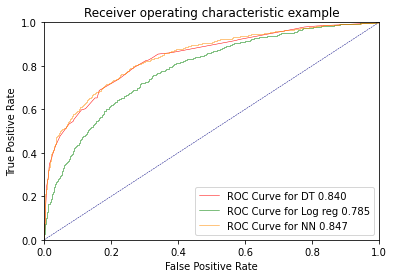

In [237]:
import matplotlib.pyplot as plt
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt),
 color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg,
 label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg),
 color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn),
 color='darkorange', lw=0.5)
# plt.plot(fpr[2], tpr[2], color='darkorange',
# lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [238]:
# import the model
from sklearn.ensemble import VotingClassifier
# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=
 [('dt', decision_tree_cv), ('lr', default_logistic_model),
 ('nn', default_nn_model)], voting='soft')

In [239]:
# fit the voting classifier to training data
voting.fit(X_train, y_train)
# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))
# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

Ensemble train accuracy: 0.8699455119013478
Ensemble test accuracy: 0.8591502174640347
ROC score of voting classifier: 0.861871291836355


In [240]:
Rubbish

NameError: name 'Rubbish' is not defined

In [ ]:
model = MLPClassifier(max_iter=100, random_state=rs)
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model)

In [126]:
print(X_train.shape)

(6974, 16)


In [129]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 17, 1)]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8629194149698881
Test accuracy: 0.8574774171963867
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      2379
         Yes       0.75      0.45      0.56       610

    accuracy                           0.86      2989
   macro avg       0.81      0.71      0.74      2989
weighted avg       0.85      0.86      0.84      2989

{'hidden_layer_sizes': (6,)}


In [130]:
# new parameters
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8629194149698881
Test accuracy: 0.8574774171963867
              precision    recall  f1-score   support

          No       0.87      0.96      0.91      2379
         Yes       0.75      0.45      0.56       610

    accuracy                           0.86      2989
   macro avg       0.81      0.71      0.74      2989
weighted avg       0.85      0.86      0.84      2989

{'hidden_layer_sizes': (6,)}


In [132]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001], 'max_iter':[120,130,140], 'activation': ['tanh', 'relu']}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8614855176369371
Test accuracy: 0.8601538976246236
              precision    recall  f1-score   support

          No       0.87      0.97      0.92      2379
         Yes       0.78      0.44      0.56       610

    accuracy                           0.86      2989
   macro avg       0.82      0.70      0.74      2989
weighted avg       0.85      0.86      0.84      2989

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (5,), 'max_iter': 120}


In [133]:
params = {'hidden_layer_sizes': [(4,), (5,), (6,), (7,)],
 'alpha': [0.1,0.01], 'max_iter':[100,110,120,130,140]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.8614855176369371
Test accuracy: 0.8578119772499163
              precision    recall  f1-score   support

          No       0.87      0.97      0.92      2379
         Yes       0.77      0.43      0.55       610

    accuracy                           0.86      2989
   macro avg       0.82      0.70      0.74      2989
weighted avg       0.85      0.86      0.84      2989

{'alpha': 0.1, 'hidden_layer_sizes': (5,), 'max_iter': 140}


In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [ ]:
plot_roc_curve(cv, X_test_rfe, y_test_log)

In [ ]:
# grid search CV for decision tree
params_dt = {'criterion': ['gini'],
 'max_depth': range(2, 5),
 'min_samples_leaf': range(40, 61, 5)}
cv = GridSearchCV(param_grid=params_dt, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
dt_model = cv.best_estimator_
print(dt_model)
# grid search CV for logistic regression
params_log_reg = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params_log_reg, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
log_reg_model = cv.best_estimator_
print(log_reg_model)
# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid=params_nn, estimator=
 MLPClassifier(max_iter=500, random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
nn_model = cv.best_estimator_
print(nn_model)